Import Libraries

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

Download Assets

In [4]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [5]:
URL = r"https://www.dropbox.com/s/qhhlqcica1nvtaw/opencv_bootcamp_assets_NB1.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB1.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)   

Display Image Directly

In [6]:
# Display 18x18 pixel image.
Image(filename="checkerboard_18x18.png")

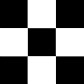

In [7]:
# Display 84x84 pixel image.
Image(filename="checkerboard_84x84.jpg")

Reading images using OpenCV

In [13]:
# Read image as gray scale.
cb_img = cv2.imread("checkerboard_18x18.png", 0)

# Print the image data (pixel values), element of a 2D numpy array.
# Each pixel value is 8-bits [0,255]
print(cb_img)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

Display Image attributes

In [14]:
# print the size  of image
print("Image size (H, W) is:", cb_img.shape)

# print data-type of image
print("Data type of image is:", cb_img.dtype)

Image size (H, W) is: (18, 18)
Data type of image is: uint8


Display Images using Matplotlib

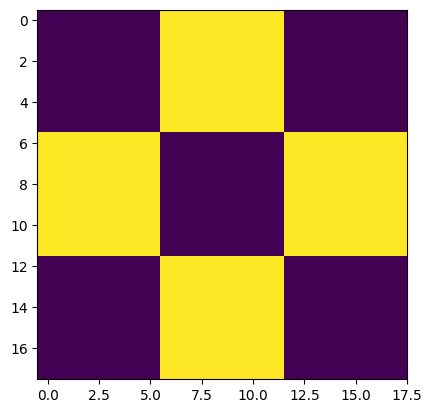

In [15]:
# Display image.
plt.imshow(cb_img)

# Even though the image was read in as a gray scale image, 
# it won't necessarily display in gray scale when using imshow(). 
# matplotlib uses different color maps and it's possible that the gray scale color map is not set.

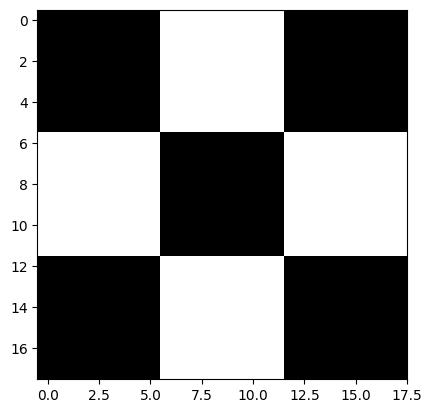

In [16]:
# Set color map to gray scale for proper rendering.
plt.imshow(cb_img, cmap="gray")

[[  0   0  15  20   1 134 233 253 253 253 255 229 130   1  29   2   0   0]
 [  0   1   5  18   0 137 232 255 254 247 255 228 129   0  24   2   0   0]
 [  7   5   2  28   2 139 230 254 255 249 255 226 128   0  27   3   2   2]
 [ 25  27  28  38   0 129 236 255 253 249 251 227 129   0  36  27  27  27]
 [  2   0   0   4   2 130 239 254 254 254 255 230 126   0   4   2   0   0]
 [132 129 131 124 121 163 211 226 227 225 226 203 164 125 125 129 131 131]
 [234 227 230 229 232 205 151 115 125 124 117 156 205 232 229 225 228 228]
 [254 255 255 251 255 222 102   1   0   0   0 120 225 255 254 255 255 255]
 [254 255 254 255 253 225 104   0  50  46   0 120 233 254 247 253 251 253]
 [252 250 250 253 254 223 105   2  45  50   0 127 223 255 251 255 251 253]
 [254 255 255 252 255 226 104   0   1   1   0 120 229 255 255 254 255 255]
 [233 235 231 233 234 207 142 106 108 102 108 146 207 235 237 232 231 231]
 [132 132 131 132 130 175 207 223 224 224 224 210 165 134 130 136 134 134]
 [  1   1   3   0   0 129

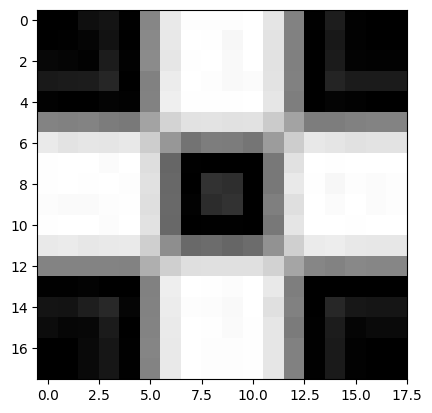

In [17]:
# Read image as gray scale.
cb_img_fuzzy = cv2.imread("checkerboard_fuzzy_18x18.jpg", 0)

# print image
print(cb_img_fuzzy)

# Display image.
plt.imshow(cb_img_fuzzy, cmap="gray")

Working with Color Images

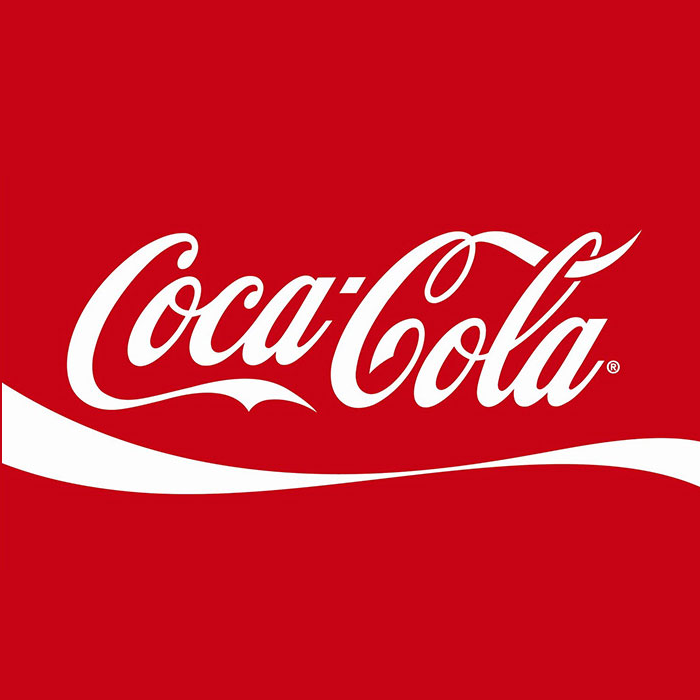

In [18]:
# Read and display Coca-Cola logo.
Image("coca-cola-logo.png")

Read and display color image

In [20]:
# Read in image
coke_img = cv2.imread("coca-cola-logo.png", 1)

# print the size  of image
print("Image size (H, W, C) is:", coke_img.shape)

# print data-type of image
print("Data type of image is:", coke_img.dtype)

Image size (H, W, C) is: (700, 700, 3)
Data type of image is: uint8


Display the Image

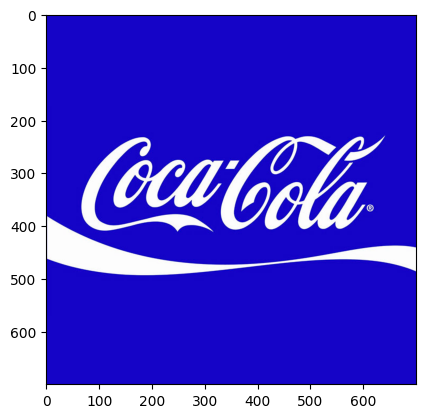

In [21]:
plt.imshow(coke_img)
#  What happened?
# The color displayed above is different from the actual image. 
# This is because matplotlib expects the image in RGB format whereas OpenCV stores images in BGR format. 
# Thus, for correct display, we need to reverse the channels of the image. 
# We will discuss about the channels in the sections below.

Reversing the image channels according to the channel order convention in matplot

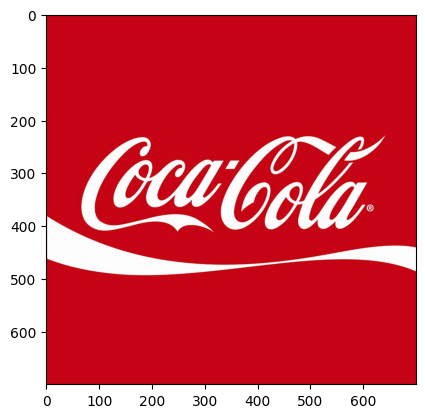

In [26]:
coke_img_channels_reversed = coke_img[:, :, ::-1]
plt.imshow(coke_img_channels_reversed)

Splitting and Merging Color Channels

Text(0.5, 1.0, 'Merged Output')

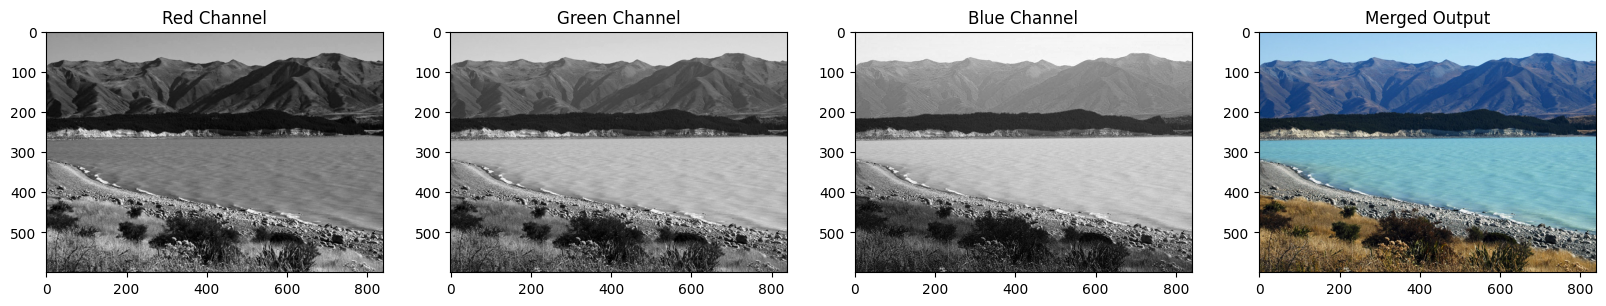

In [31]:
# Split the image into the B,G,R components
img_NZ_bgr = cv2.imread("New_Zealand_Lake.jpg", cv2.IMREAD_COLOR)
b, g, r = cv2.split(img_NZ_bgr)

# Show the channels
plt.figure(figsize=[20, 5])

plt.subplot(141);plt.imshow(r, cmap="gray");plt.title("Red Channel")
plt.subplot(142);plt.imshow(g, cmap="gray");plt.title("Green Channel")
plt.subplot(143);plt.imshow(b, cmap="gray");plt.title("Blue Channel")

# Merge the individual channels into a BGR image
imgMerged = cv2.merge((b, g, r))
# Show the merged output
plt.subplot(144)
plt.imshow(imgMerged[:, :, ::-1])
plt.title("Merged Output")

Converting to different Color Spaces
here, changing from BGR to RGB

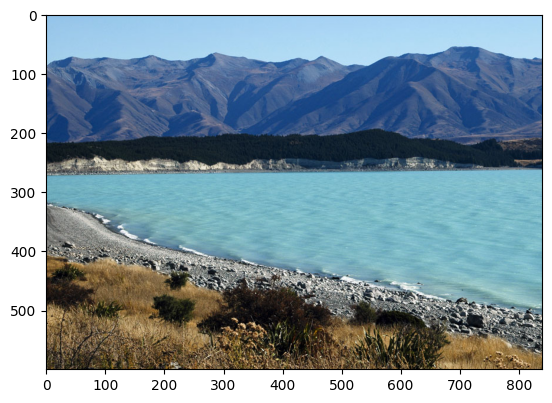

In [32]:
# OpenCV stores color channels in a differnet order than most other applications (BGR vs RGB).
img_NZ_rgb = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_NZ_rgb)

Changing to HSV color space

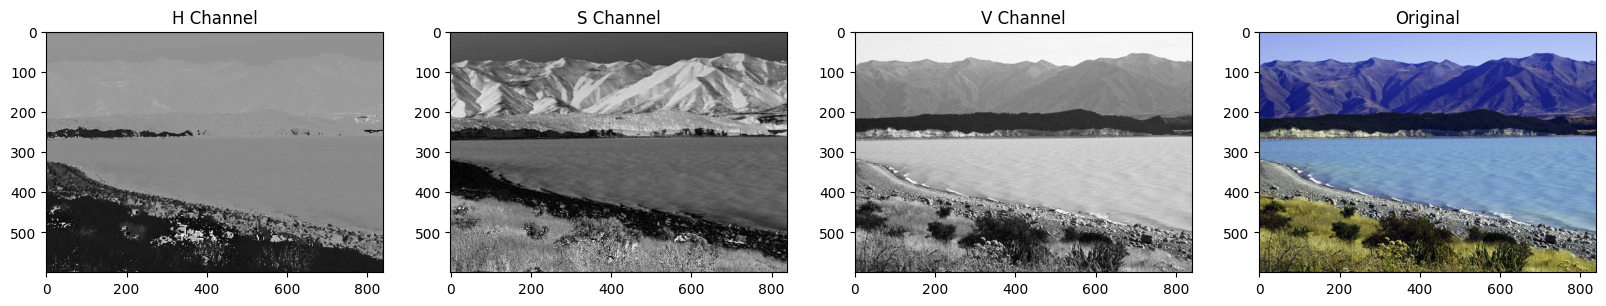

In [36]:
img_hsv = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2HSV)

# Split the image into the B,G,R components
h,s,v = cv2.split(img_hsv)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h, cmap="gray");plt.title("H Channel");
plt.subplot(142);plt.imshow(s, cmap="gray");plt.title("S Channel");
plt.subplot(143);plt.imshow(v, cmap="gray");plt.title("V Channel");
plt.subplot(144);plt.imshow(img_NZ_rgb);   plt.title("Original");

Getting Merged Output after splitting into HSV 

Text(0.5, 1.0, 'Merged Output')

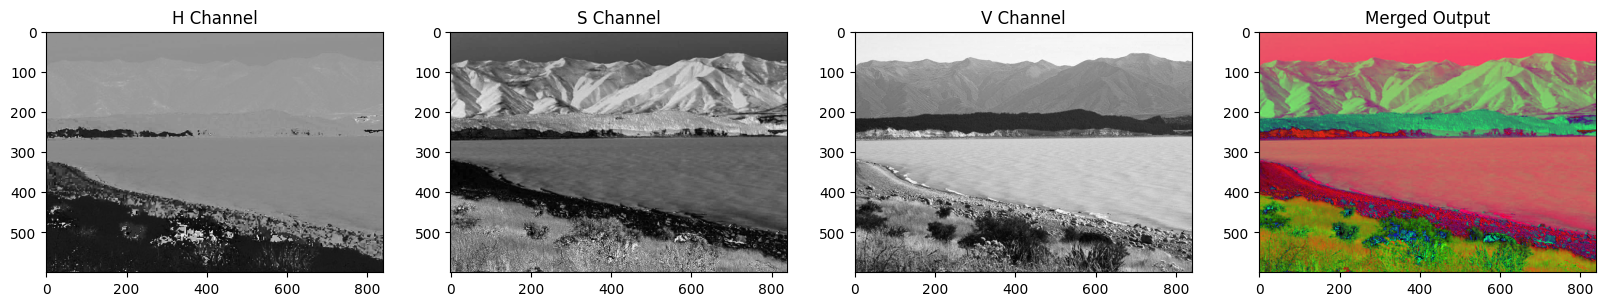

In [37]:
img_hsv = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2HSV)

# Split the image into the B,G,R components
h,s,v = cv2.split(img_hsv)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h, cmap="gray");plt.title("H Channel");
plt.subplot(142);plt.imshow(s, cmap="gray");plt.title("S Channel");
plt.subplot(143);plt.imshow(v, cmap="gray");plt.title("V Channel");
plt.subplot(144);plt.imshow(img_NZ_rgb);   plt.title("Original");

# Merge the individual channels into a BGR image
imgMerged = cv2.merge((h, s, v))
# Show the merged output
plt.subplot(144)
plt.imshow(imgMerged[:, :, ::-1])
plt.title("Merged Output")

Modifying individual Channel

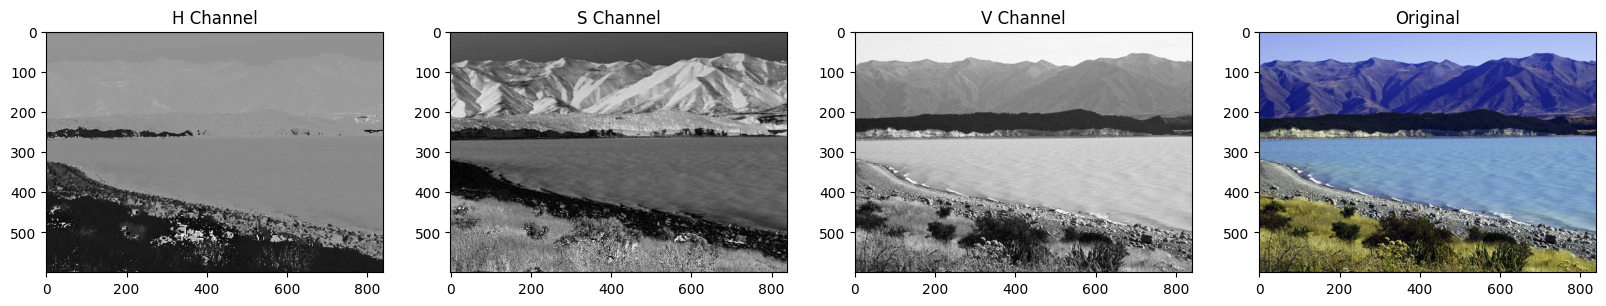

In [34]:
h_new = h + 10
img_NZ_merged = cv2.merge((h_new, s, v))
img_NZ_rgb = cv2.cvtColor(img_NZ_merged, cv2.COLOR_HSV2RGB)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h, cmap="gray");plt.title("H Channel");
plt.subplot(142);plt.imshow(s, cmap="gray");plt.title("S Channel");
plt.subplot(143);plt.imshow(v, cmap="gray");plt.title("V Channel");
plt.subplot(144);plt.imshow(img_NZ_rgb);   plt.title("Original");

Saving Images

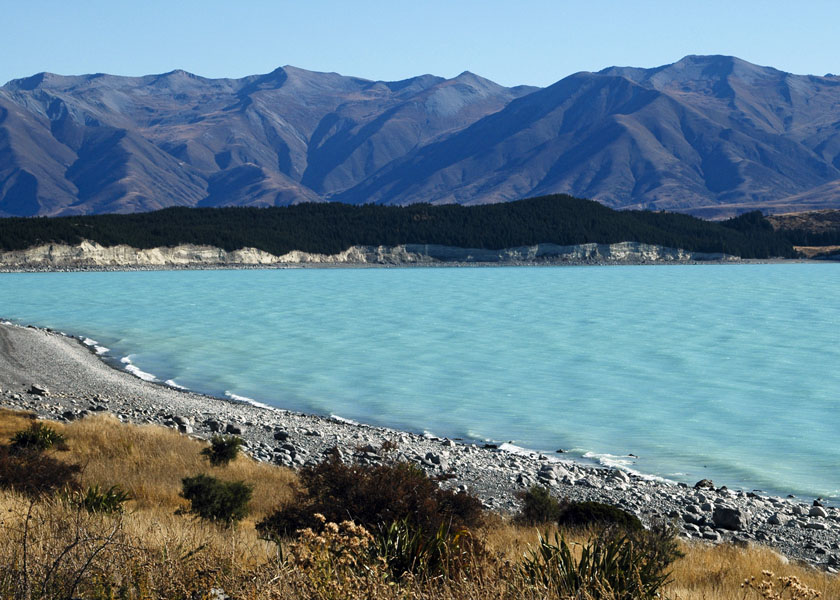

In [38]:
# save the image
cv2.imwrite("New_Zealand_Lake_SAVED.png", img_NZ_bgr)

Image(filename='New_Zealand_Lake_SAVED.png') 

In [39]:
# read the image as Color
img_NZ_bgr = cv2.imread("New_Zealand_Lake_SAVED.png", cv2.IMREAD_COLOR)
print("img_NZ_bgr shape (H, W, C) is:", img_NZ_bgr.shape)

# read the image as Grayscaled
img_NZ_gry = cv2.imread("New_Zealand_Lake_SAVED.png", cv2.IMREAD_GRAYSCALE)
print("img_NZ_gry shape (H, W) is:", img_NZ_gry.shape)

img_NZ_bgr shape (H, W, C) is: (600, 840, 3)
img_NZ_gry shape (H, W) is: (600, 840)
